## Read Data

In [1]:
import nltk

# Mengunduh paket 'punkt' yang diperlukan untuk tokenisasi
nltk.download('punkt')

# Mengunduh paket 'stopwords'
nltk.download('stopwords')

# Mengunduh paket 'wordnet' untuk lemmatization
nltk.download('wordnet')

print("Semua paket NLTK yang diperlukan telah siap.")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Semua paket NLTK yang diperlukan telah siap.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Medicine_Details.csv')
df.head()


,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29


In [3]:
df.describe()

,Excellent Review %,Average Review %,Poor Review %
count,11825.000000,11825.000000,11825.000000
mean,38.516025,35.756364,25.727611
std,25.225343,18.268134,23.991985
min,0.000000,0.000000,0.000000
25%,22.000000,27.000000,0.000000
50%,34.000000,35.000000,22.000000
75%,51.000000,47.000000,35.000000
max,100.000000,88.000000,100.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11825 entries, 0 to 11824
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Medicine Name       11825 non-null  object
 1   Composition         11825 non-null  object
 2   Uses                11825 non-null  object
 3   Side_effects        11825 non-null  object
 4   Image URL           11825 non-null  object
 5   Manufacturer        11825 non-null  object
 6   Excellent Review %  11825 non-null  int64 
 7   Average Review %    11825 non-null  int64 
 8   Poor Review %       11825 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 831.6+ KB


In [5]:
df.duplicated().sum()

np.int64(84)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.isnull().sum()

Medicine Name         0
Composition           0
Uses                  0
Side_effects          0
Image URL             0
Manufacturer          0
Excellent Review %    0
Average Review %      0
Poor Review %         0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_30216\894561093.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_manufacturers.values, y=top_15_manufacturers.index, palette='viridis')


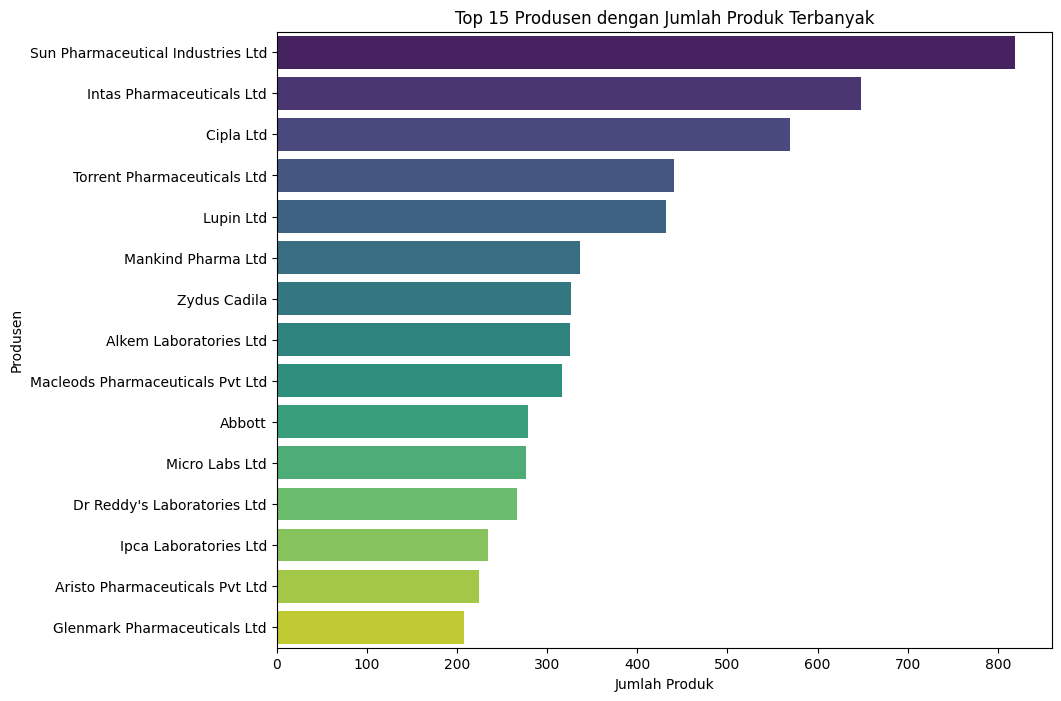

In [8]:
top_15_manufacturers = df['Manufacturer'].value_counts().head(15)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_15_manufacturers.values, y=top_15_manufacturers.index, palette='viridis')
plt.title('Top 15 Produsen dengan Jumlah Produk Terbanyak')
plt.xlabel('Jumlah Produk')
plt.ylabel('Produsen')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_30216\2055114712.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Jumlah', y='Zat Aktif', data=composition_df, palette='plasma')


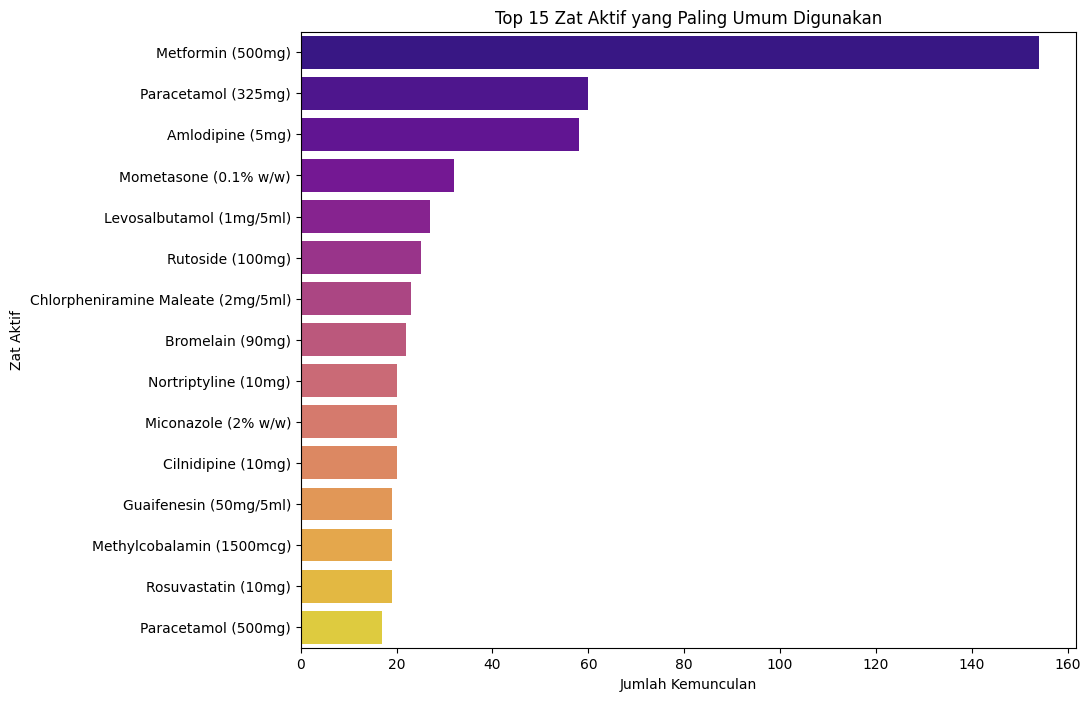

In [9]:
from collections import Counter
import re

# Mengambil semua zat aktif, membersihkan dosis, dan menghitungnya
all_compositions = ' '.join(df['Composition'])
# Menghapus info dosis seperti (500mg)
cleaned_compositions = re.sub(r'\\s*\\(.*?\\)\\s*', ' ', all_compositions)
composition_counts = Counter(cleaned_compositions.split(' + '))

# Ubah ke DataFrame untuk visualisasi
composition_df = pd.DataFrame(composition_counts.most_common(15), columns=['Zat Aktif', 'Jumlah'])

plt.figure(figsize=(10, 8))
sns.barplot(x='Jumlah', y='Zat Aktif', data=composition_df, palette='plasma')
plt.title('Top 15 Zat Aktif yang Paling Umum Digunakan')
plt.xlabel('Jumlah Kemunculan')
plt.ylabel('Zat Aktif')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_30216\1421943533.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Jumlah Laporan', y='Efek Samping', data=side_effects_df, palette='rocket')


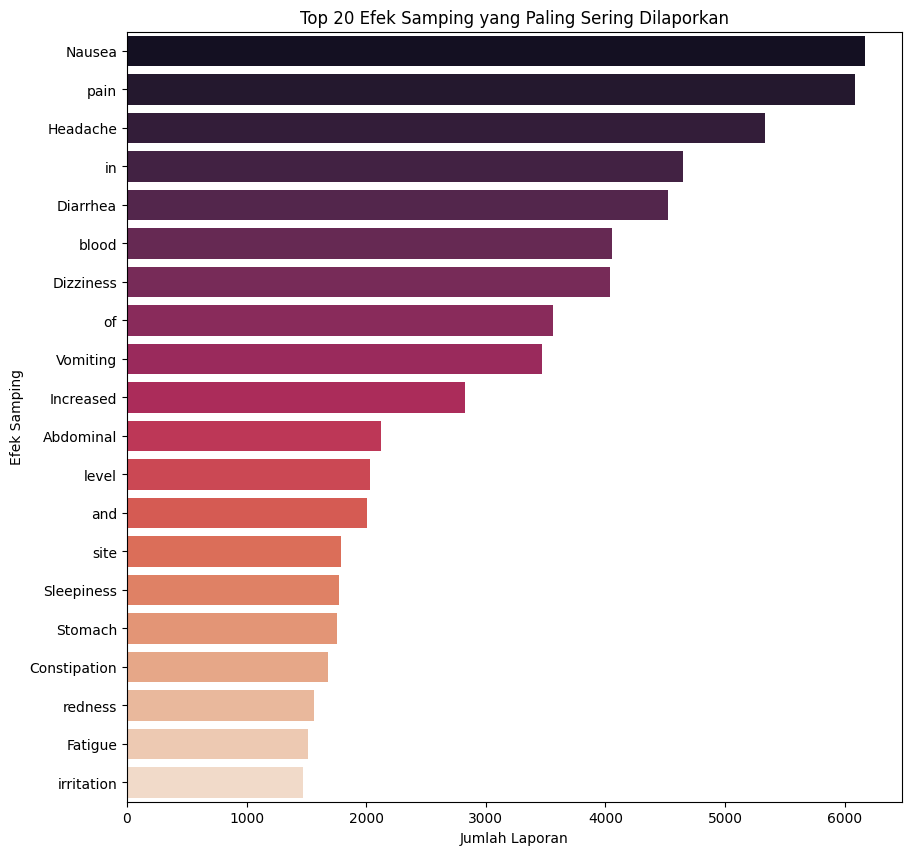

In [10]:
# Memisahkan setiap efek samping dan memasukkannya ke dalam satu list besar
all_side_effects_list = []
for index, row in df.iterrows():
    effects = row['Side_effects'].split(' ')
    # Menghapus kata-kata kosong yang mungkin muncul
    effects = [effect for effect in effects if effect] 
    all_side_effects_list.extend(effects)

# Menghitung frekuensi setiap efek samping
side_effects_counts = Counter(all_side_effects_list)

# Ubah ke DataFrame untuk visualisasi
side_effects_df = pd.DataFrame(side_effects_counts.most_common(20), columns=['Efek Samping', 'Jumlah Laporan'])

# Visualisasikan 20 efek samping teratas
plt.figure(figsize=(10, 10))
sns.barplot(x='Jumlah Laporan', y='Efek Samping', data=side_effects_df, palette='rocket')
plt.title('Top 20 Efek Samping yang Paling Sering Dilaporkan')
plt.xlabel('Jumlah Laporan')
plt.ylabel('Efek Samping')
plt.show()

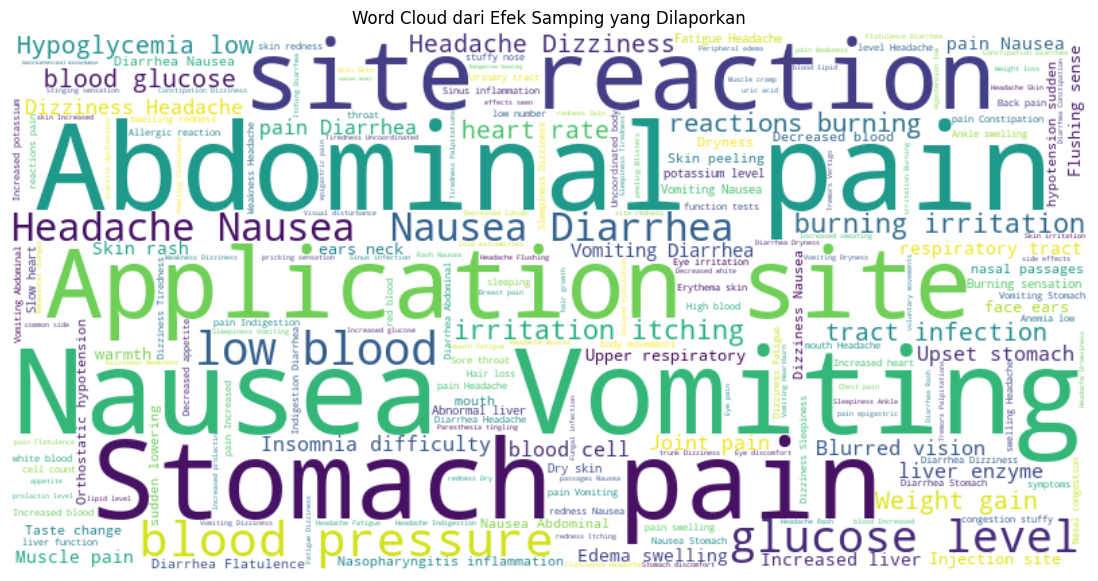

In [11]:
from wordcloud import WordCloud

# Gabungkan semua teks efek samping menjadi satu teks besar
side_effects_text = ' '.join(df['Side_effects'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(side_effects_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # Hilangkan sumbu
plt.title('Word Cloud dari Efek Samping yang Dilaporkan')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_30216\1421943533.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Jumlah Laporan', y='Efek Samping', data=side_effects_df, palette='rocket')


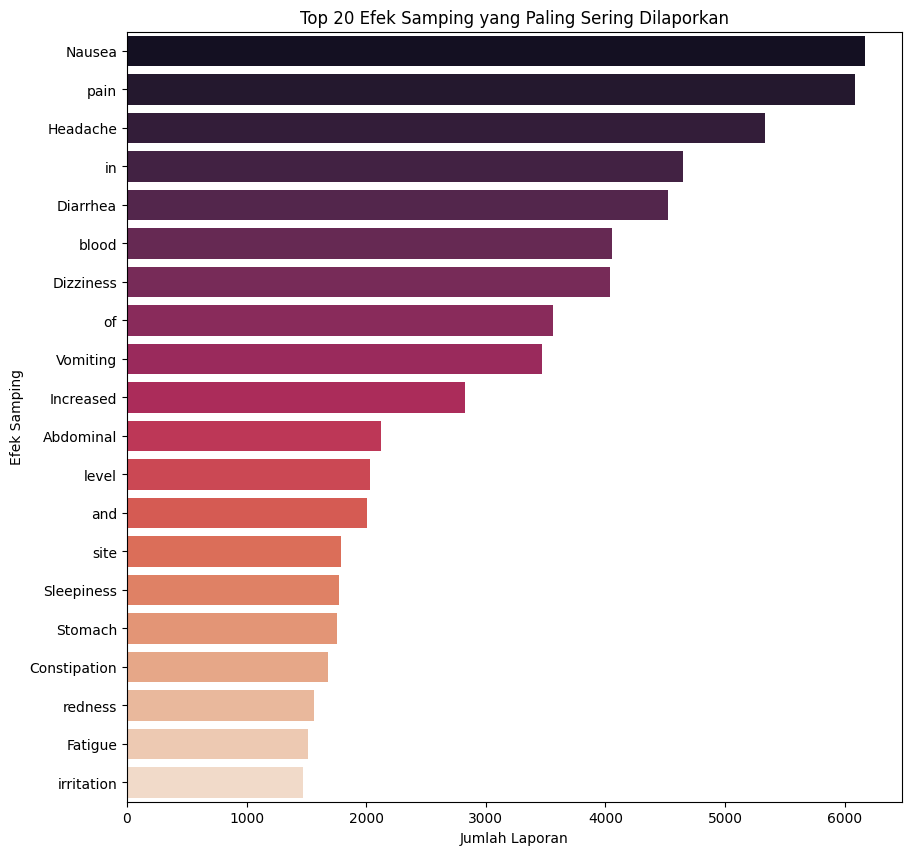

In [12]:
# Memisahkan setiap efek samping dan memasukkannya ke dalam satu list besar
all_side_effects_list = []
for index, row in df.iterrows():
    effects = row['Side_effects'].split(' ')
    # Menghapus kata-kata kosong yang mungkin muncul
    effects = [effect for effect in effects if effect] 
    all_side_effects_list.extend(effects)

# Menghitung frekuensi setiap efek samping
side_effects_counts = Counter(all_side_effects_list)

# Ubah ke DataFrame untuk visualisasi
side_effects_df = pd.DataFrame(side_effects_counts.most_common(20), columns=['Efek Samping', 'Jumlah Laporan'])

# Visualisasikan 20 efek samping teratas
plt.figure(figsize=(10, 10))
sns.barplot(x='Jumlah Laporan', y='Efek Samping', data=side_effects_df, palette='rocket')
plt.title('Top 20 Efek Samping yang Paling Sering Dilaporkan')
plt.xlabel('Jumlah Laporan')
plt.ylabel('Efek Samping')
plt.show()

## Preprocessing


In [13]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Inisialisasi komponen NLTK
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    """
    Sebuah fungsi untuk membersihkan data teks melalui 5 langkah:
    1. Lowercasing
    2. Menghapus tanda baca dan angka
    3. Tokenization
    4. Menghapus stopwords
    5. Lemmatization
    """
    # 1. Lowercasing: Mengubah semua teks menjadi huruf kecil
    text = text.lower()

    # 2. Remove Punctuation and Numbers: Hanya menyisakan huruf
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. Tokenization: Memecah kalimat menjadi daftar kata
    tokens = word_tokenize(text)

    # 4. Remove Stopwords: Menghapus kata-kata umum seperti 'and', 'the', 'in'
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # 5. Lemmatization: Mengubah kata ke bentuk dasarnya (misal: 'effects', 'effective' -> 'effect')
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    # Gabungkan kembali menjadi satu string teks yang bersih
    return " ".join(lemmatized_tokens)

In [14]:
# Terapkan fungsi pada kolom 'Uses' dan simpan di kolom baru
df['uses_cleaned'] = df['Uses'].apply(preprocess_text)

# Terapkan fungsi pada kolom 'Side_effects' dan simpan di kolom baru
df['side_effects_cleaned'] = df['Side_effects'].apply(preprocess_text)

# Tampilkan hasilnya untuk melihat perbandingan antara teks asli dan teks bersih
print("Contoh Hasil Preprocessing:")
print(df[['Uses', 'uses_cleaned', 'Side_effects', 'side_effects_cleaned']].head())

Contoh Hasil Preprocessing:
                                                Uses  \
0   Cancer of colon and rectum Non-small cell lun...   
1                  Treatment of Bacterial infections   
2                  Treatment of Bacterial infections   
3                      Treatment of Cough with mucus   
4  Treatment of Gastroesophageal reflux disease (...   

                                        uses_cleaned  \
0  cancer colon rectum nonsmall cell lung cancer ...   
1                      treatment bacterial infection   
2                      treatment bacterial infection   
3                              treatment cough mucus   
4  treatment gastroesophageal reflux disease acid...   

                                        Side_effects  \
0  Rectal bleeding Taste change Headache Noseblee...   
1  Vomiting Nausea Diarrhea Mucocutaneous candidi...   
2                     Nausea Abdominal pain Diarrhea   
3  Nausea Vomiting Diarrhea Upset stomach Stomach...   
4     Headache Dia

## Feature Extraction

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF Vectorizer
# max_features=5000 berarti kita hanya akan mengambil 5000 kata paling penting untuk efisiensi
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Lakukan fit_transform untuk belajar kosakata dari 'uses_cleaned' dan mengubahnya menjadi matriks angka
X = tfidf_vectorizer.fit_transform(df['uses_cleaned'])

# Lihat bentuk (shape) dari matriks yang dihasilkan
print("Bentuk (shape) dari matriks TF-IDF untuk 'Uses':")
print(X.shape)

Bentuk (shape) dari matriks TF-IDF untuk 'Uses':
(11741, 687)



Distribusi Sentimen:
sentiment
Positif    5630
Netral     3412
Negatif    2699
Name: count, dtype: int64


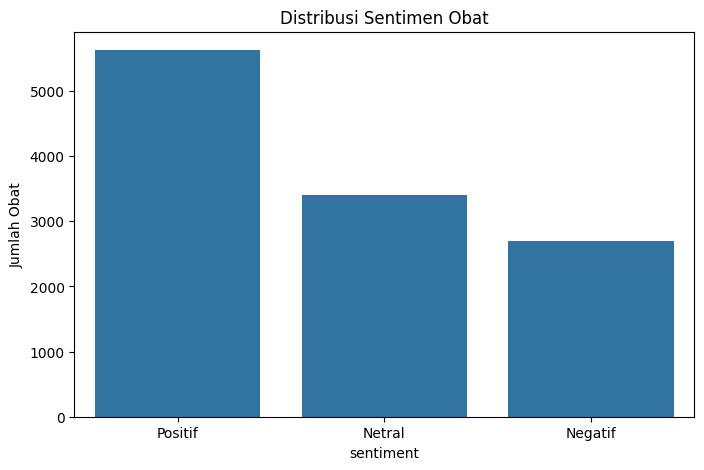

In [16]:
def create_sentiment(row):
    # Kita tetapkan margin 15% untuk menentukan sentimen yang kuat
    if row['Excellent Review %'] > row['Poor Review %'] + 15:
        return 'Positif'
    elif row['Poor Review %'] > row['Excellent Review %'] + 15:
        return 'Negatif'
    else:
        return 'Netral'

# Terapkan fungsi ini untuk membuat kolom target 'sentiment'
df['sentiment'] = df.apply(create_sentiment, axis=1)

# Mari kita lihat distribusi sentimen yang berhasil kita buat
print("\nDistribusi Sentimen:")
sentiment_distribution = df['sentiment'].value_counts()
print(sentiment_distribution)

# Visualisasikan distribusinya
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values)
plt.title('Distribusi Sentimen Obat')
plt.ylabel('Jumlah Obat')
plt.show()

## Modelling


In [17]:
from sklearn.model_selection import train_test_split

# X adalah matriks TF-IDF Anda dari langkah sebelumnya
# df['sentiment'] adalah kolom target Anda
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    df['sentiment'], 
    test_size=0.2, 
    random_state=42, 
    stratify=df['sentiment'] # Penting untuk menjaga proporsi sentimen yang seimbang
)

print("Data berhasil dibagi menjadi set latih dan uji.")
print(f"Ukuran data latih: {X_train.shape[0]} baris")
print(f"Ukuran data uji: {X_test.shape[0]} baris")

Data berhasil dibagi menjadi set latih dan uji.
Ukuran data latih: 9392 baris
Ukuran data uji: 2349 baris


In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# Inisialisasi dan latih model Naive Bayes
print("Melatih model Multinomial Naive Bayes...")
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
print("Model Naive Bayes berhasil dilatih.")

# Inisialisasi dan latih model Logistic Regression
print("\nMelatih model Logistic Regression...")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
print("Model Logistic Regression berhasil dilatih.")

Melatih model Multinomial Naive Bayes...
Model Naive Bayes berhasil dilatih.

Melatih model Logistic Regression...
Model Logistic Regression berhasil dilatih.


In [19]:
from sklearn.metrics import classification_report

# Lakukan prediksi pada data uji
y_pred_nb = nb_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

# Tampilkan laporan evaluasi
print("--- Laporan Evaluasi untuk Multinomial Naive Bayes ---")
print(classification_report(y_test, y_pred_nb))

print("\n--- Laporan Evaluasi untuk Logistic Regression ---")
print(classification_report(y_test, y_pred_lr))

--- Laporan Evaluasi untuk Multinomial Naive Bayes ---
              precision    recall  f1-score   support

     Negatif       0.42      0.18      0.25       540
      Netral       0.36      0.30      0.32       683
     Positif       0.54      0.75      0.63      1126

    accuracy                           0.48      2349
   macro avg       0.44      0.41      0.40      2349
weighted avg       0.46      0.48      0.45      2349


--- Laporan Evaluasi untuk Logistic Regression ---
              precision    recall  f1-score   support

     Negatif       0.42      0.16      0.23       540
      Netral       0.39      0.24      0.30       683
     Positif       0.54      0.82      0.65      1126

    accuracy                           0.50      2349
   macro avg       0.45      0.41      0.39      2349
weighted avg       0.47      0.50      0.45      2349



In [20]:
# Pastikan 'tfidf_vectorizer' adalah objek TfidfVectorizer yang sudah Anda .fit_transform()
# dan 'lr_model' adalah model Logistic Regression yang sudah Anda .fit()

# Dapatkan nama-nama fitur (kata-kata) dari vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Dapatkan koefisien (bobot) dari model Logistic Regression
# Karena ini multi-kelas, kita lihat koefisien untuk setiap kelas
coefficients = lr_model.coef_

# Buat DataFrame untuk melihat koefisien dengan lebih mudah
coef_df = pd.DataFrame(coefficients, columns=feature_names, index=lr_model.classes_)

# Mari kita lihat kata-kata yang paling berpengaruh
print("--- Kata-kata Paling Berpengaruh ---")

# Kata-kata pendorong sentimen 'Positif'
top_positive_words = coef_df.loc['Positif'].sort_values(ascending=False).head(15)
print("\nTop 15 Kata Pendorong Sentimen 'Positif':")
print(top_positive_words)

# Kata-kata pendorong sentimen 'Negatif'
top_negative_words = coef_df.loc['Negatif'].sort_values(ascending=False).head(15)
print("\nTop 15 Kata Pendorong Sentimen 'Negatif':")
print(top_negative_words)

--- Kata-kata Paling Berpengaruh ---

Top 15 Kata Pendorong Sentimen 'Positif':
rabies                1.124839
zoster                0.987762
depression            0.943826
syphilisprevention    0.903417
nasal                 0.871168
blood                 0.823795
sunburn               0.822921
pressure              0.794933
allergy               0.787134
bloating              0.776117
redness               0.775119
hepatitis             0.747497
calcium               0.734865
hay                   0.728675
cancer                0.728487
Name: Positif, dtype: float64

Top 15 Kata Pendorong Sentimen 'Negatif':
obesity                   1.165862
hyperpigmentation         1.117434
infertility               1.091319
wart                      0.989373
female                    0.930717
ulcer                     0.897066
schizophreniatreatment    0.894627
smooth                    0.852564
cytomegalovirus           0.842809
gouttreatment             0.823946
postmenopausal            0.7971

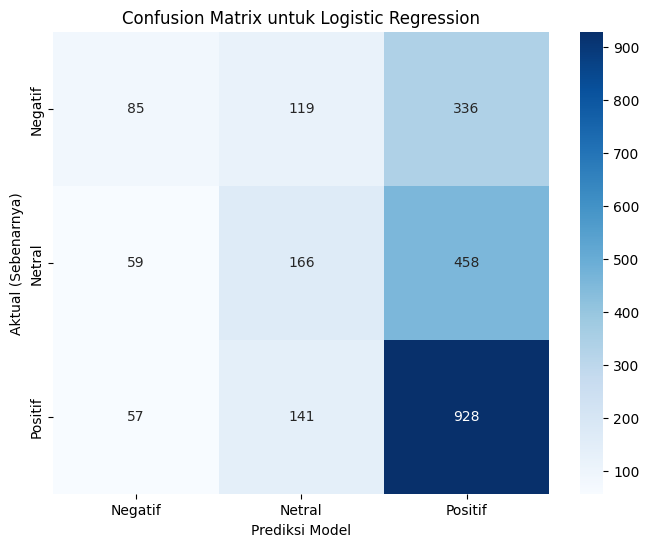

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# y_pred_lr adalah hasil prediksi dari model Logistic Regression Anda
cm = confusion_matrix(y_test, y_pred_lr)
class_names = ['Negatif', 'Netral', 'Positif'] # Sesuaikan urutan jika berbeda

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Prediksi Model')
plt.ylabel('Aktual (Sebenarnya)')
plt.title('Confusion Matrix untuk Logistic Regression')
plt.show()

## Hyperparameter tuning


In [22]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter yang ingin kita uji untuk Logistic Regression
# 'C' adalah parameter kekuatan regularisasi
param_grid = {
    'C': [0.1, 1, 10, 100]
}

# Buat objek GridSearchCV
# scoring='f1_macro' adalah metrik yang baik untuk masalah multi-kelas
grid_search = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000, random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',
    verbose=2,
    n_jobs=-1
)

# Latih pencarian pada data training Anda
grid_search.fit(X_train, y_train)

# Tampilkan parameter terbaik
print(f"Parameter 'C' terbaik ditemukan: {grid_search.best_params_['C']}")

# Simpan model terbaik hasil tuning
best_lr_model = grid_search.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Parameter 'C' terbaik ditemukan: 100


In [23]:
# Lakukan prediksi dengan model terbaik
y_pred_best = best_lr_model.predict(X_test)

# Tampilkan laporan klasifikasi final
print("--- Laporan Evaluasi Final untuk Model yang Dioptimalkan ---")
print(classification_report(y_test, y_pred_best))

--- Laporan Evaluasi Final untuk Model yang Dioptimalkan ---
              precision    recall  f1-score   support

     Negatif       0.41      0.16      0.23       540
      Netral       0.37      0.24      0.29       683
     Positif       0.54      0.82      0.65      1126

    accuracy                           0.50      2349
   macro avg       0.44      0.41      0.39      2349
weighted avg       0.46      0.50      0.45      2349



In [24]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    """
    Fungsi untuk membersihkan data teks:
    1. Mengubah ke huruf kecil (lowercasing).
    2. Menghapus semua karakter non-alfabet (tanda baca, angka).
    3. Memecah kalimat menjadi kata (tokenization).
    4. Menghapus kata-kata umum (stopwords).
    5. Mengubah kata ke bentuk dasarnya (lemmatization).
    """
    # 1. Lowercasing
    text = text.lower()

    # 2. Remove non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. Tokenization
    tokens = word_tokenize(text)

    # 4. Remove Stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # 5. Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    # Gabungkan kembali menjadi satu string
    return " ".join(lemmatized_tokens)

In [25]:
# Terapkan fungsi pada kolom 'review' untuk membuat kolom baru 'review_cleaned'
# Mungkin butuh beberapa menit untuk berjalan
df['review_cleaned'] = df['review'].apply(preprocess_text)

# Tampilkan hasilnya untuk melihat perbandingan
print("Contoh Hasil Preprocessing:")
print(df[['review', 'review_cleaned']].head())

KeyError: 'review'

In [ ]:
# Terapkan fungsi pada kolom 'review' untuk membuat kolom baru 'review_cleaned'
# Mungkin butuh beberapa menit untuk berjalan
df['review_cleaned'] = df['review'].apply(preprocess_text)

# Tampilkan hasilnya untuk melihat perbandingan
print("Contoh Hasil Preprocessing:")
print(df[['review', 'review_cleaned']].head())

In [ ]:
from wordcloud import WordCloud

# Gabungkan semua teks dari kolom yang sudah bersih
all_reviews_cleaned = ' '.join(df['review_cleaned'])

# Buat dan tampilkan word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white', collocations=False).generate(all_reviews_cleaned)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari Ulasan yang Telah Dibersihkan')
plt.show()